# Imports

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Face Verification

In [2]:
DeepFace.verify(img1_path="data/img1.jpg", img2_path="data/img2.jpg")

{'verified': True,
 'distance': 0.4133766351437491,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 345,
   'y': 211,
   'w': 769,
   'h': 769,
   'left_eye': (571, 517),
   'right_eye': (853, 523)},
  'img2': {'x': 516,
   'y': 192,
   'w': 512,
   'h': 512,
   'left_eye': (666, 390),
   'right_eye': (857, 389)}},
 'time': 1.81}

# Face Recognition

In [3]:
DeepFace.find(
    img_path=os.path.join("data", "family_faces", "Kuba.jpg"),
    db_path=os.path.join("data", "family_faces"),
)[0]

24-04-04 20:29:08 - Found 8 newly added image(s), 8 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]


24-04-04 20:29:10 - There are now 8 representations in ds_vggface_opencv_v2.pkl
24-04-04 20:29:10 - Searching data\family_faces\Kuba.jpg in 8 length datastore
24-04-04 20:29:10 - find function duration 1.9461045265197754 seconds


,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,data\family_faces\Kuba.jpg,d5ea9da97a3ce06a19100ba8594c416735e80d29,708,255,425,425,708,255,425,425,0.68,0.0


# Embeddings

In [4]:
DeepFace.represent(img_path="data/img1.jpg")[0].keys()

dict_keys(['embedding', 'facial_area', 'face_confidence'])

# Facial Analysis

In [5]:
DeepFace.analyze(img_path="data/family_faces/Kuba.jpg")

Action: race: 100%|██████████| 4/4 [00:08<00:00,  2.04s/it]   


[{'emotion': {'angry': 0.6453377194702625,
   'disgust': 5.203946216170152e-05,
   'fear': 15.354685485363007,
   'happy': 0.6350907031446695,
   'sad': 5.039247497916222,
   'surprise': 17.382486164569855,
   'neutral': 60.94309687614441},
  'dominant_emotion': 'neutral',
  'region': {'x': 708,
   'y': 255,
   'w': 425,
   'h': 425,
   'left_eye': (843, 417),
   'right_eye': (996, 425)},
  'face_confidence': 0.94,
  'age': 23,
  'gender': {'Woman': 0.0017773192666936666, 'Man': 99.9982237815857},
  'dominant_gender': 'Man',
  'race': {'asian': 0.23818511981517076,
   'indian': 1.712363213300705,
   'black': 0.021115229174029082,
   'white': 36.44050061702728,
   'middle eastern': 52.6599645614624,
   'latino hispanic': 8.92786756157875},
  'dominant_race': 'middle eastern'}]

# Face Detection and Alignment

In [6]:
DeepFace.extract_faces(img_path="data/family_faces/Kuba.jpg", target_size=(224, 224))

[{'face': array([[[0.74509805, 0.70980394, 0.68235296],
          [0.7490196 , 0.7137255 , 0.68235296],
          [0.7529412 , 0.7176471 , 0.6901961 ],
          ...,
          [0.52156866, 0.49019608, 0.47843137],
          [0.46666667, 0.43529412, 0.42352942],
          [0.41960785, 0.3882353 , 0.3764706 ]],
  
         [[0.7411765 , 0.7058824 , 0.6784314 ],
          [0.74509805, 0.70980394, 0.68235296],
          [0.7490196 , 0.7137255 , 0.6862745 ],
          ...,
          [0.34117648, 0.30980393, 0.29803923],
          [0.31764707, 0.29803923, 0.28235295],
          [0.36862746, 0.34901962, 0.33333334]],
  
         [[0.74509805, 0.70980394, 0.68235296],
          [0.74509805, 0.70980394, 0.68235296],
          [0.74509805, 0.70980394, 0.68235296],
          ...,
          [0.42745098, 0.40392157, 0.39215687],
          [0.34117648, 0.32156864, 0.30588236],
          [0.5529412 , 0.53333336, 0.5137255 ]],
  
         ...,
  
         [[0.59607846, 0.5176471 , 0.49411765],
      

# Plotting Bounding Box on Image

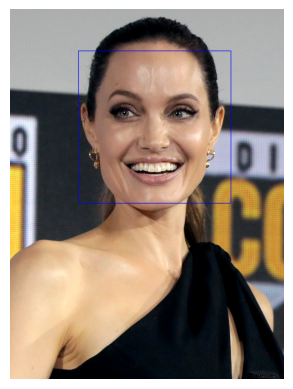

In [7]:
face = DeepFace.extract_faces(img_path="data/img1.jpg")[0]["facial_area"]

img = cv2.imread("data/img1.jpg")
cv2.rectangle(
    img,
    (face["x"], face["y"]),
    (face["x"] + face["w"], face["y"] + face["h"]),
    (255, 0, 0),
    2,
)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

# Real-Time Video Facial Analysis

In [8]:
DeepFace.stream(
    db_path="data/family_faces",
    enable_face_analysis=True,
    time_threshold=5,
    frame_threshold=5,
)

24-04-04 20:29:20 - Age model is just built
24-04-04 20:29:20 - Gender model is just built
24-04-04 20:29:20 - Emotion model is just built
24-04-04 20:29:20 - VGG-Face is built
24-04-04 20:29:31 - freezed
